In [1]:
import numpy as np
from skopt import load
from skopt.plots import plot_evaluations, plot_objective, plot_convergence, partial_dependence
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot options
plt.set_cmap("viridis")
sns.set()
sns.set_style("whitegrid")

/opt/anaconda/envs/dage/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/anaconda/envs/dage/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

<Figure size 432x288 with 0 Axes>

In [2]:
# Print available checkpoints
cp_dir = Path('../runs/optimizer')
for p in cp_dir.glob('*'):
     print(p.name)

office-dage-W-D
digits-ccsa-mnist-svhn
dsne_ft_wd
digits-dsne-mnist-mnist_m
dage_lda_ft_wa
dage_mnist_usps_3
ccsa_ft_da
office-dsne-A-D
dage_lda_ft_da
tune_source_mnist_usps_0
office-dsne-W-A
office-ccsa-A-W
dage_mnist_usps_4
digits-dage-mnist-mnist_m
dsne_mnist_usps_2
ccsa_ft_aw
dage_mfa_ft_wd
office-dage-A-D
office-ccsa-A-D
dage_mnist_usps_1
dsne_ft_aw
dsne_ft_wa
dsne_ft_ad
dage_mnist_usps_0
office-ccsa-D-W
office-ccsa-D-A
ccsa_ft_wd
office-dsne-A-W
dsne_ft_da
office-dage-D-A
digits-dsne-M-U
office-dage-D-W
office-ccsa-W-D
office-dsne-W-D
dage_mfa_ft_da
digits-dsne-mnist-svhn
digits-dage-M-U
office-dage-A-W
dage_lda_ft_ad
ccsa_ft_wa
dage_mfa_ft_aw
ccsa_ft_dw
office-dage-W-A
dage_mfa_ft_ad
dsne_mnist_usps_1
office-dsne-D-W
digits-ccsa-M-U
office-ccsa-W-A
dage_lda_ft_wd
dage_mnist_usps_2
dage_mfa_ft_dw
dsne_ft_dw
dage_mfa_ft_wa
office-dsne-D-A
digits-dage-mnist-svhn
ccsa_ft_ad
dage_lda_ft_dw
dsne_mnist_usps_3
ccsa_mnist_usps_2
dage_lda_ft_aw
digits-ccsa-mnist-mnist_m


In [17]:
# Load checkpoint
experiment_id = 'digits-dage-mnist-svhn'
cp_path = cp_dir / experiment_id / 'checkpoint.pkl'
res = load(str(cp_path.resolve()))

In [18]:
print('iterations: {}'.format(len(res.x_iters)))
print('max acc: {}'.format(-res.fun))
print('best hyper parameters:')
params = dict(zip([s.name for s in res.space], res.x))
params

iterations: 50
max acc: 0.4995010730347062
best hyper parameters:


{'lr': 0.0004992492750990689,
 'inv_mom': 0.026934389325180115,
 'lr_decay': 1e-07,
 'dropout': 0.1,
 'l2': 5.644014622137777e-06,
 'alpha': 0.49936462910179,
 'ce_ratio': 0.9980778285881913,
 'bn': 0,
 'loss_param_1': 1,
 'loss_param_2': 99,
 'source': 'mnist',
 'target': 'svhn',
 'gpu_id': '0',
 'method': 'dage',
 'seed': '42',
 'experiment': 'digits'}

In [13]:
# show tested parameters and their results
df = pd.DataFrame(
    [[-x[0], *x[1]] for x in list(zip(res.func_vals, res.x_iters))],
    columns=['acc', *[s.name for s in res.space]]
).reset_index().sort_values('acc', ascending=False)
df['mom'] = 1-df['inv_mom']
df.head(20)

,index,acc,lr,inv_mom,lr_decay,dropout,l2,alpha,ce_ratio,bn,loss_param_1,source,target,gpu_id,method,seed,experiment,mom
48,48,0.526129,0.002712,0.500000,1.000000e-07,0.562753,1.218046e-04,0.010000,0.779858,0,2.233815,mnist,svhn,0,ccsa,42,digits,0.500000
49,49,0.502973,0.000676,0.500000,1.000000e-07,0.687368,1.000000e-03,0.010000,0.616313,0,0.609033,mnist,svhn,0,ccsa,42,digits,0.500000
32,32,0.467952,0.100000,0.045436,5.457728e-07,0.543478,1.342267e-05,0.295368,0.785888,1,0.736227,mnist,svhn,0,ccsa,42,digits,0.954564
46,46,0.441544,0.003515,0.435937,1.000000e-07,0.196190,9.649428e-06,0.010000,0.640249,0,4.623522,mnist,svhn,0,ccsa,42,digits,0.564063
44,44,0.434230,0.001499,0.500000,8.463427e-04,0.119154,3.876510e-07,0.010000,0.020898,0,2.561650,mnist,svhn,0,ccsa,42,digits,0.500000
23,23,0.425510,0.100000,0.213883,1.000000e-02,0.611656,1.000000e-03,0.519621,0.515085,1,5.079196,mnist,svhn,0,ccsa,42,digits,0.786117
33,33,0.401821,0.100000,0.054386,9.253994e-07,0.100000,1.587680e-04,0.266527,0.476611,1,0.001000,mnist,svhn,0,ccsa,42,digits,0.945614
12,12,0.400399,0.003360,0.113560,1.000000e-02,0.221336,1.173821e-07,0.010000,0.787241,0,3.985106,mnist,svhn,0,ccsa,42,digits,0.886440
18,18,0.398253,0.007225,0.449413,1.000000e-02,0.100000,6.938355e-06,0.041263,0.046937,0,7.246522,mnist,svhn,0,ccsa,42,digits,0.550587
41,41,0.393701,0.100000,0.053004,1.041246e-07,0.454886,2.271942e-07,0.010000,0.349144,1,6.564211,mnist,svhn,0,ccsa,42,digits,0.946996


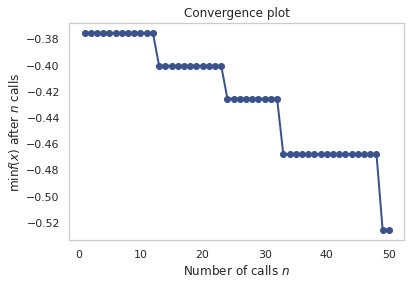

In [14]:
conv_fig = plot_convergence(res)

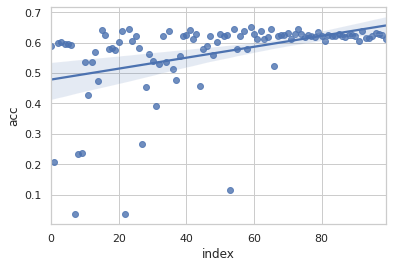

In [10]:
reg_fig = sns.regplot(x='index', y='acc', data=df)

In [197]:
[d.name for d in res.space.dimensions]

['lr',
 'inv_mom',
 'lr_decay',
 'dropout',
 'l2',
 'alpha',
 'ce_ratio',
 'bn',
 'loss_param_1',
 'num_unfrozen',
 'source',
 'target',
 'gpu_id',
 'method',
 'seed',
 'experiment']

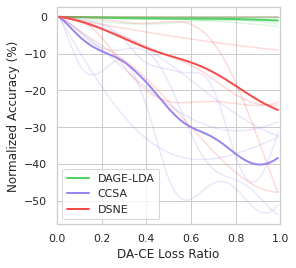

In [224]:
param_index = 5
param_name = "DA-CE Loss Ratio" # 5
# param_name = "S-T CE Loss Ratio" # 6
# param_name = space.dimensions[param_index].name

fig, ax = plt.subplots(1, 1, figsize=(4,4))

# Names of runs
for method, color in [("dage", "#50d264"), ("ccsa", "#9987ef"), ("dsne", "#f64c4b")] :
    run_names = [f"office-{method}-{src}-{tgt}" for src, tgt in itertools.product(["A","D","W"], ["A","D","W"]) if src != tgt]

    acc, xi, yi = None, None, None

    for run_name in run_names:
        # Load checkpoint
        cp_path = cp_dir / run_name / 'checkpoint.pkl'
        res = load(str(cp_path.resolve()))

        xi, yi = partial_dependence(
            res.space, 
            res.models[-1],
            i=param_index,
            j=None,
            sample_points=res.space.transform(res.space.rvs(n_samples=500)),
            n_points=50
        )
        yi = np.array(yi)
        yi = -(yi - yi.min())*100
        acc = acc + yi if acc is not None else yi

        ax.plot(
            xi, yi, color, alpha=0.2, 
    #         label=run_name[12:]
        )

        ax.set_ylabel("Normalized Accuracy (%)")
        ax.set_xlabel(param_name)
        if space.dimensions[param_index].prior == "log-uniform":
            ax.set_xscale('log')
        # plt.axvline(result.x[i], linestyle="--", color="r", lw=1)

    label = "DAGE-LDA" if method == "dage" else method.upper()
    ax.plot(xi, acc/len(run_names), color, linewidth=2.0, label=label)


ax.set_xlim(0,1)
# ax.set_ylim(-15,1)
plt.legend()

In [216]:
fig.savefig(f"figures/sensitivity-{param_name}.pdf", bbox_inches='tight')

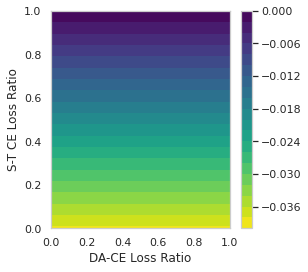

In [234]:
i = 5
j = 6
param_name_i = "DA-CE Loss Ratio" # 5
param_name_j = "S-T CE Loss Ratio" # 6

fig, ax = plt.subplots(1, 1, figsize=(4,4))

method = "dage"
run_names = [f"office-{method}-{src}-{tgt}" for src, tgt in itertools.product(["A","D","W"], ["A","D","W"]) if src != tgt]

acc, xi, yi = None, None, None

for run_name in run_names:
    # Load checkpoint
    cp_path = cp_dir / run_name / 'checkpoint.pkl'
    res = load(str(cp_path.resolve()))

    xi, yi, zi = partial_dependence(space, result.models[-1],
                                    di, dj, rvs_transformed, n_points)

    zi = np.array(zi)
    zi = -(zi - zi.min())*100
    acc = acc + zi if acc is not None else zi


cs = ax.contourf(xi, yi, acc/len(run_names), levels=20, locator=locator, cmap='viridis_r')
ax.set_xlabel(param_name_i)
ax.set_ylabel(param_name_j)
fig.colorbar(cs)

# ax.set_xlim(0,1)
# ax.set_ylim(-15,1)
# plt.legend()

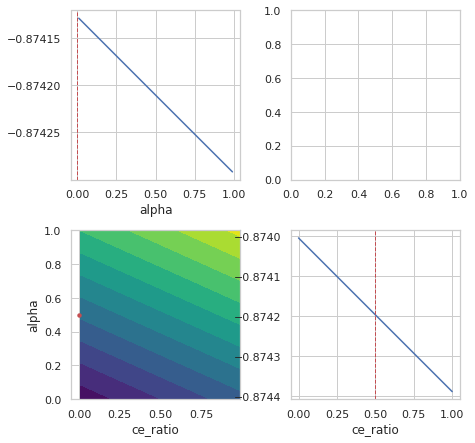

In [227]:
# Load checkpoint
experiment_id = 'office-dage-D-W'
cp_path = cp_dir / experiment_id / 'checkpoint.pkl'
res = load(str(cp_path.resolve()))

result = res
n_samples = 250
n_points = 10
levels = 10
dims = [5,6]
n_dims = len(dims)
size = 3

# zscale = "linear"
locator=None

space = result.space
samples = np.asarray(result.x_iters)
rvs_transformed = space.transform(space.rvs(n_samples=n_samples))


fig, ax = plt.subplots(n_dims, n_dims,
                           figsize=(size * n_dims, size * n_dims))

fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
                    hspace=0.3, wspace=0.3)

for i, di in enumerate(dims):
    for j, dj in enumerate(dims):
        if i == j:
            xi, yi = partial_dependence(space, result.models[-1], di,
                                        j=None,
                                        sample_points=rvs_transformed,
                                        n_points=n_points)

            ax[i, i].plot(xi, yi)
            ax[i, i].axvline(result.x[i], linestyle="--", color="r", lw=1)
            
            ax[i, j].set_xlabel(space.dimensions[di].name)
            if space.dimensions[di].prior == "log-uniform":
                ax[i, j].set_xscale('log')

        # lower triangle
        elif i > j:
            xi, yi, zi = partial_dependence(space, result.models[-1],
                                            di, dj,
                                            rvs_transformed, n_points)
            ax[i, j].contourf(xi, yi, zi, levels, locator=locator, cmap='viridis_r')
#             ax[i, j].scatter(samples[:, j], samples[:, i],c=['k'], s=10, lw=0.)
            ax[i, j].scatter(result.x[j], result.x[i], c=['r'], s=20, lw=0.)
            ax[i, j].set_ylabel(space.dimensions[dj].name)
        
            if space.dimensions[dj].prior == "log-uniform" :
                ax[i, j].set_yscale('log')
        
            ax[i, j].set_xlabel(space.dimensions[di].name)
            if space.dimensions[di].prior == "log-uniform":
                ax[i, j].set_xscale('log')

ValueError: not enough values to unpack (expected 2, got 1)

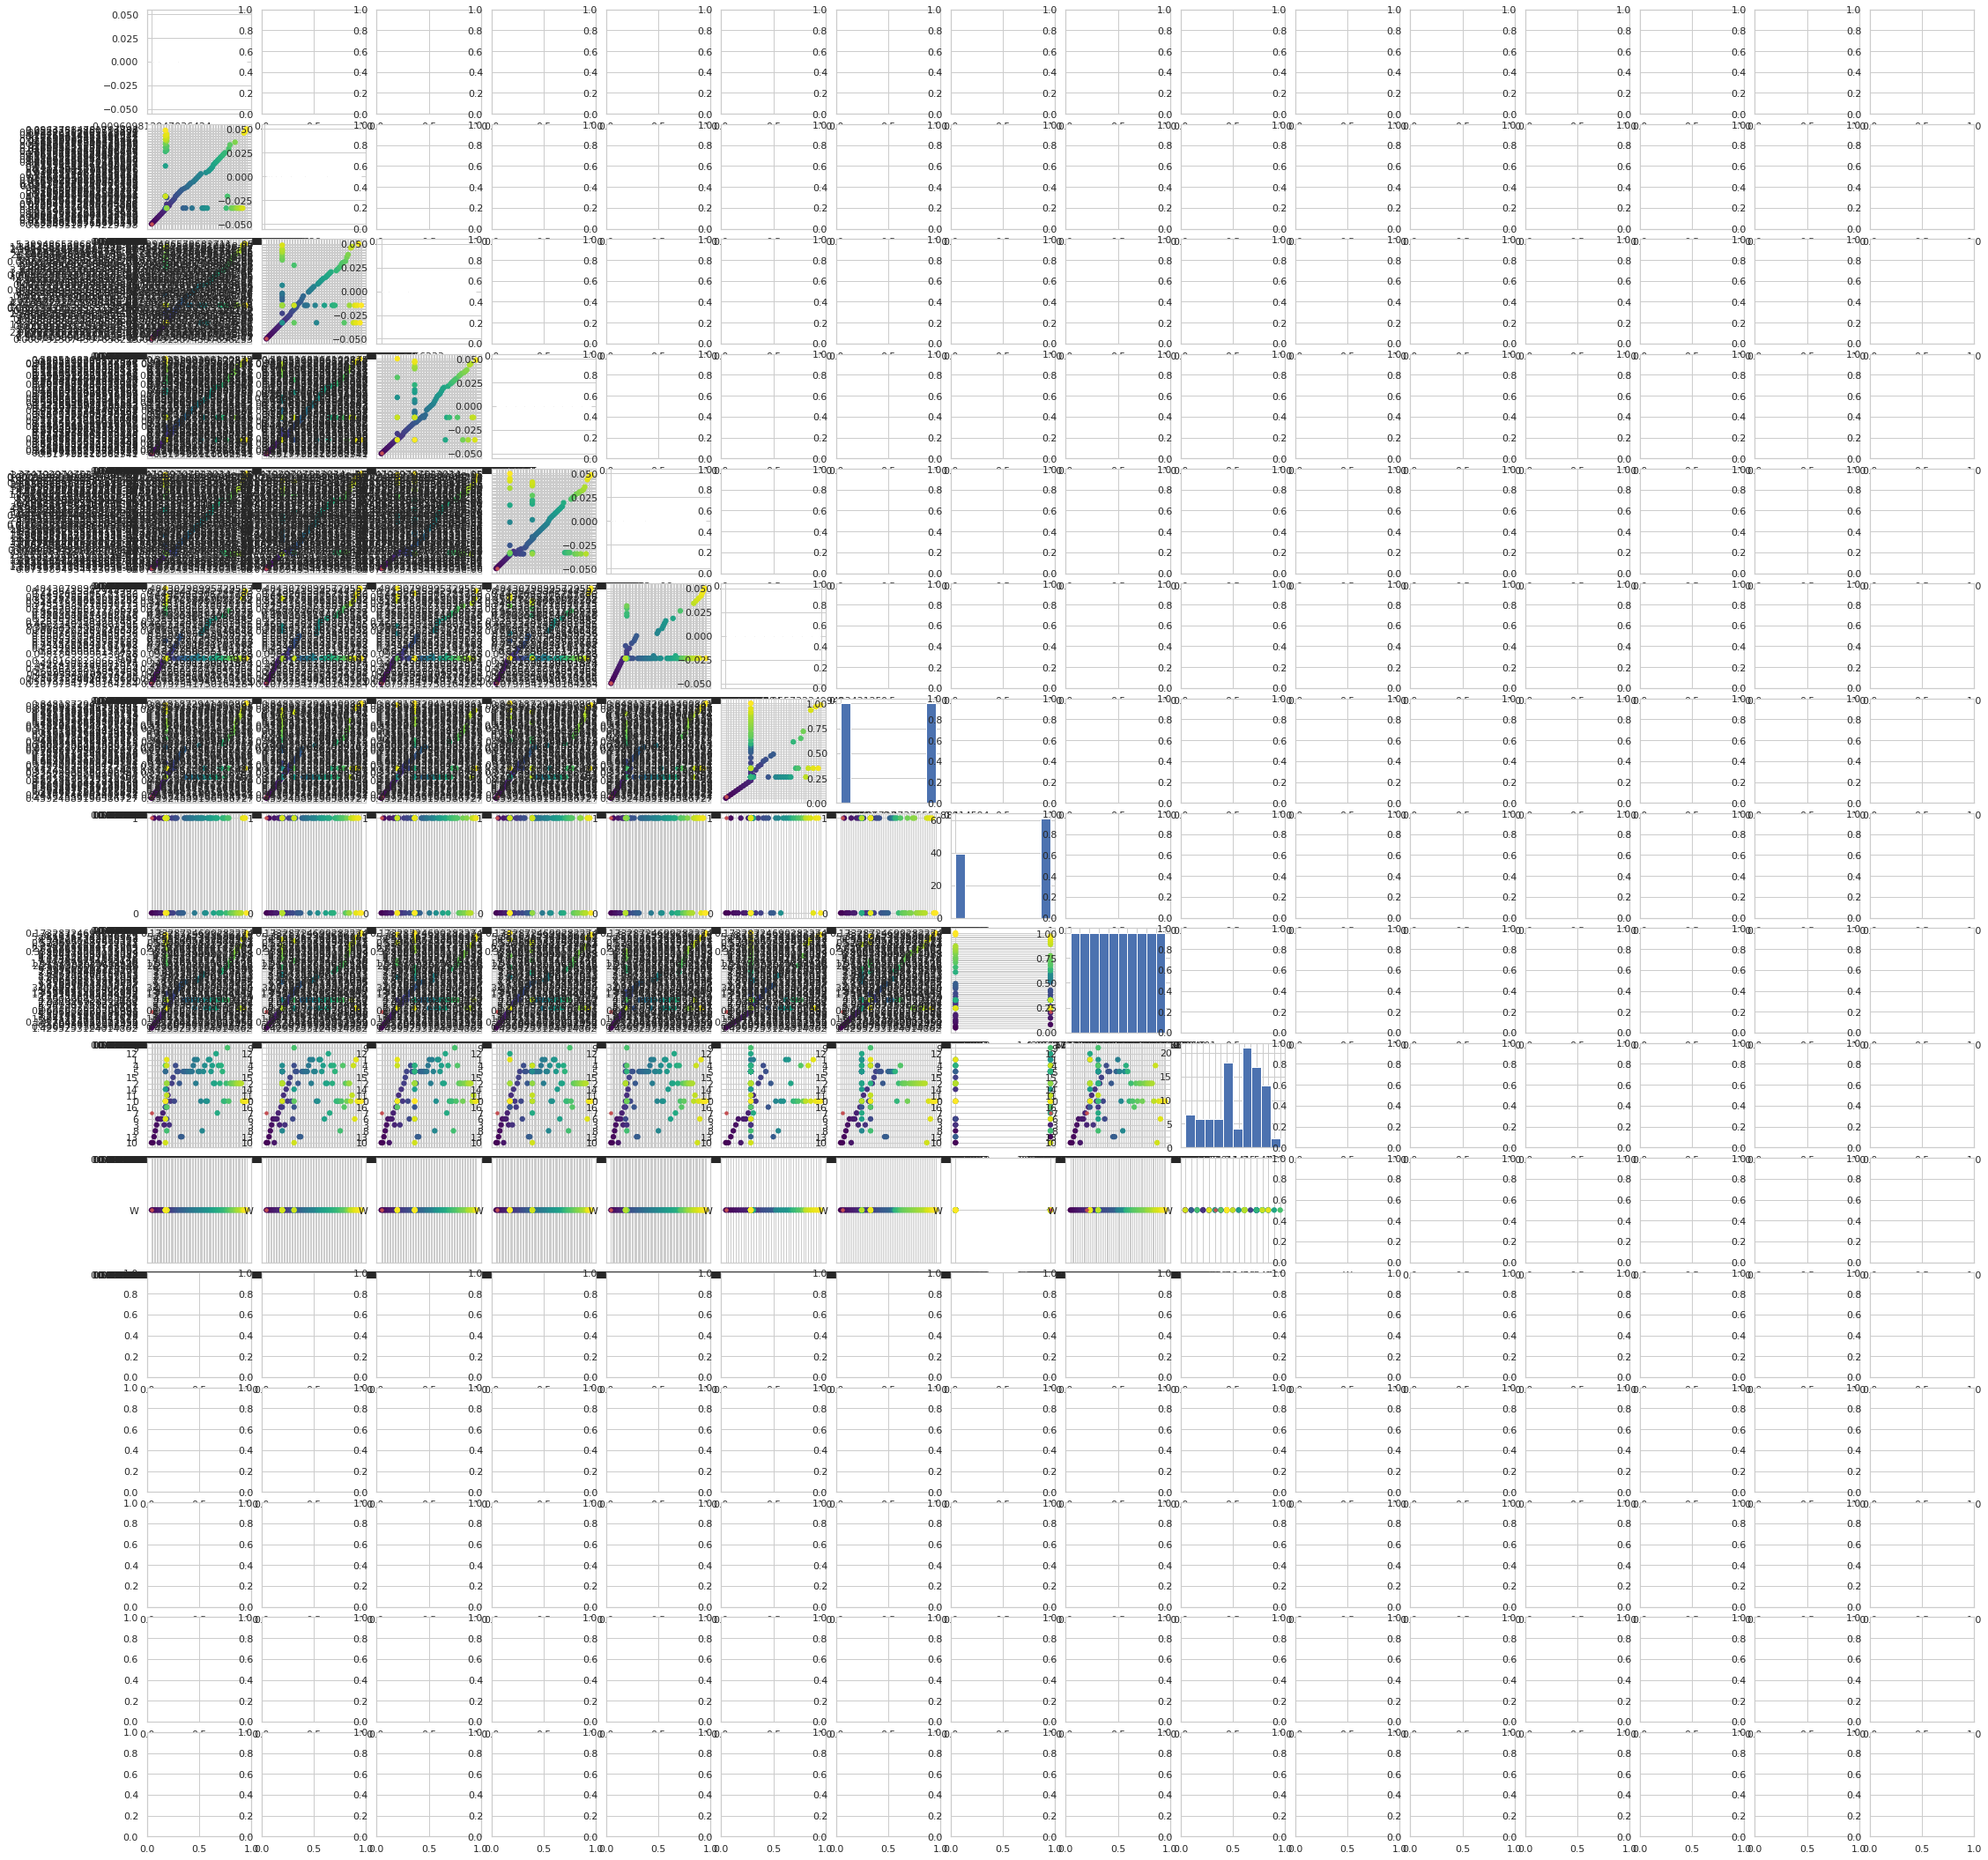

In [4]:
""" Evaluations
The diagonal shows histograms for each of the dimensions. 
The off the diagonal are two dimensional scatter plot of all points are shown. 
The order in which points were evaluated is encoded in the color of each point. 
Darker/purple colors correspond to earlier samples and lighter/yellow colors correspond to later samples. 
A red point shows the location of the minimum found by the optimization process.
"""
eval_fig = plot_evaluations(res, bins=10)